In [73]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [98]:
def F(x, y, x0, y0, x1, y1):
    return y*(x1-x0)+x*(y0-y1)+y1*x0-y0*x1

def Bresenham(x0, y0, x1, y1):
    image = np.ones((y1+1,x1+1))
    mirror = False
    if (y1-y0)>(x1-x0):
        mirror = True
        x0, x1, y0, y1 = y0, y1, x0, x1
        print("slope greater 1. So mirroring at diagonal.")
    
    y = y0
    d = F(x0+1, y0+0.5, x0, y0, x1, y1)
    
    for x in range(x0, x1+1):
        if mirror == True:
            print("Please set pixel", y, x)
            image[x,y]=0
        else:
            print("Please set pixel", x, y)
            image[y,x]=0
        print("d is", d)
        if d<0:
            y += 1
            d += x1-x0 + y0-y1
        else:
            d += y0-y1
    return image

For the first line that has $(x_0, y_0) = (1,2)$ and $(x_1, y_1) = (5,3)$

Please set pixel 1 2
d is 1.0
Please set pixel 2 2
d is 0.0
Please set pixel 3 2
d is -1.0
Please set pixel 4 3
d is 2.0
Please set pixel 5 3
d is 1.0
[[ 1.  1.  1.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.  1.]]


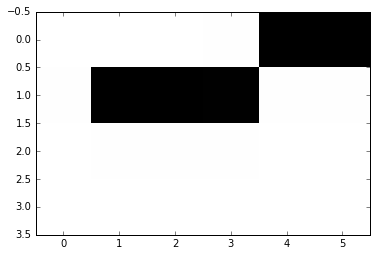

In [149]:
image = Bresenham(1,2,5,3)
plt.imshow(np.flipud(image), interpolation='none', cmap='gray');
print(np.flipud(image))

For the second that has $(x_0, y_0) = (2,1)$ and $(x_1, y_1) = (4,4)$

slope greater 1. So mirroring at diagonal.
Please set pixel 2 1
d is -0.5
Please set pixel 3 2
d is 0.5
Please set pixel 3 3
d is -1.5
Please set pixel 4 4
d is -0.5
[[ 1.  1.  1.  1.  0.]
 [ 1.  1.  1.  0.  1.]
 [ 1.  1.  1.  0.  1.]
 [ 1.  1.  0.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


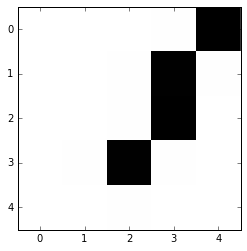

In [104]:
image = Bresenham(2,1,4,4)
plt.imshow(np.flipud(image), interpolation='none', cmap='gray');
print(np.flipud(image))

In [168]:
def Bresenham_antialias(x0, y0, x1, y1):
    image = np.zeros((y1+1,x1+1))
    mirror = False
    if (y1-y0)>(x1-x0):
        mirror = True
        x0, x1, y0, y1 = y0, y1, x0, x1
        print("slope greater 1. So mirroring at diagonal.")
    
    y = y0
    d = F(x0+1, y0+0.5, x0, y0, x1, y1)
    
    for x in range(x0, x1+1):
        a = d/2
        if x==x0 and y==y0:
            if mirror == False:
                print("Please set {},{}".format(x,y))
                image[y,x]=1
            else:
                print("Please set {},{}".format(y,x))
                image[x,y]=1
        if x==x1:
            if mirror == False:
                print("Please set {},{}".format(x,y))
                image[y,x]=1
                image[y-1,x]=0
            else:
                print("Please set {},{}".format(y,x))
                image[x,y]=1
                image[x,y-1]=0
            break
        if d<0:
            if a >= -0.5:
                if mirror == True:
                    print("Please set pixel1 {}, {} with {}".format(y,x+1,0.5+a))
                    image[x+1,y]=0.5+a
                    print("Please set pixel2 {}, {} with {}".format(y+1, x+1,0.5-a))
                    image[x+1,y+1]= 0.5-a
                else:
                    print("Please set pixel1 {}, {} with {}".format(x+1,y,0.5+a))
                    image[y,x+1]=0.5+a
                    print("Please set pixel2 {}, {} with {}".format(x+1,y+1,0.5-a))
                    image[y+1,x+1]= 0.5-a
            else:
                if a >= -0.5:
                    if mirror == True:
                        print("Please set pixel1 {}, {} with {}".format(y+1,x+1,1.5+a))
                        image[x+1,y+1]=1.5+a
                        print("Please set pixel2 {}, {} with {}".format(y+2, x+1,-0.5-a))
                        image[x+1,y+2]=-0.5-a
                    else:
                        print("Please set pixel1 {}, {} with {}".format(x+1,y+1,1.5+a))
                        image[y+1,x+1]=1.5+a
                        print("Please set pixel2 {}, {} with {}".format(x+1,y+2,-0.5-a))
                        image[y+2,x+1]=-0.5-a
            y += 1
            d += x1-x0 + y0-y1
        else:
            if a <= 0.5:
                if mirror == True:
                    print("Please set pixel1 {}, {} with {}".format(y,x+1,0.5+a))
                    image[x+1,y]=0.5+a
                    print("Please set pixel2 {}, {} with {}".format(y+1, x+1,0.5-a))
                    image[x+1,y+1]=0.5-a
                else:
                    print("Please set pixel1 {}, {} with {}".format(x+1,y,0.5+a))
                    image[y,x+1]=0.5+a
                    print("Please set pixel2 {}, {} with {}".format(x+1,y+1,0.5-a))
                    image[y+1,x+1]=0.5-a
            else:
                if a >= -0.5:
                    if mirror == True:
                        print("Please set pixel1 {}, {} with {}".format(y,x+1,1.5-a))
                        image[x+1,y]=1.5-a
                        print("Please set pixel2 {}, {} with {}".format(y-1, x+1,-0.5+a))
                        image[x+1,y-1]=-0.5+a
                    else:
                        print("Please set pixel1 {}, {} with {}".format(x+1,y,1.5-a))
                        image[y,x+1]=1.5-a
                        print("Please set pixel2 {}, {} with {}".format(x+1,y-1,-0.5+a))
                        image[y-1,x+1]=-0.5+a
            d += y0-y1
    return image

Please set 1,2
Please set pixel1 2, 2 with 1.0
Please set pixel2 2, 3 with 0.0
Please set pixel1 3, 2 with 0.5
Please set pixel2 3, 3 with 0.5
Please set pixel1 4, 2 with 0.0
Please set pixel2 4, 3 with 1.0
Please set pixel1 5, 3 with 0.5
Please set pixel2 5, 2 with 0.5
Please set 5,3
[[ 0.   0.   0.   0.5  1.   1. ]
 [ 0.   1.   1.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0. ]]


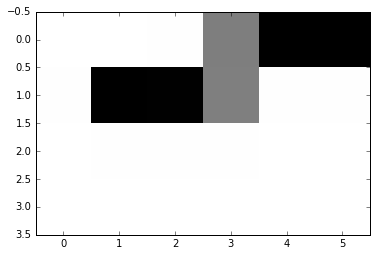

In [169]:
image = Bresenham_antialias(1,2,5,3)
plt.imshow(np.flipud(image), interpolation='none', cmap='gray_r');
print(np.flipud(image))

slope greater 1. So mirroring at diagonal.
Please set 2,1
Please set pixel1 2, 2 with 0.25
Please set pixel2 3, 2 with 0.75
Please set pixel1 3, 3 with 0.75
Please set pixel2 4, 3 with 0.25
Please set 4,4
[[ 0.    0.    0.    0.    1.  ]
 [ 0.    0.    0.    0.75  0.25]
 [ 0.    0.    0.25  0.75  0.  ]
 [ 0.    0.    1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.  ]]


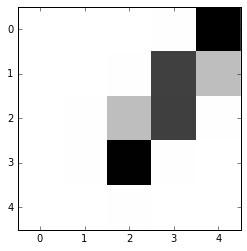

In [170]:
image = Bresenham_antialias(2,1,4,4)
plt.imshow(np.flipud(image), interpolation='none', cmap='gray_r');
print(np.flipud(image))